In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfMain = pd.read_csv("kyphosis.csv")
df = dfMain.copy(deep = True)
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [3]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


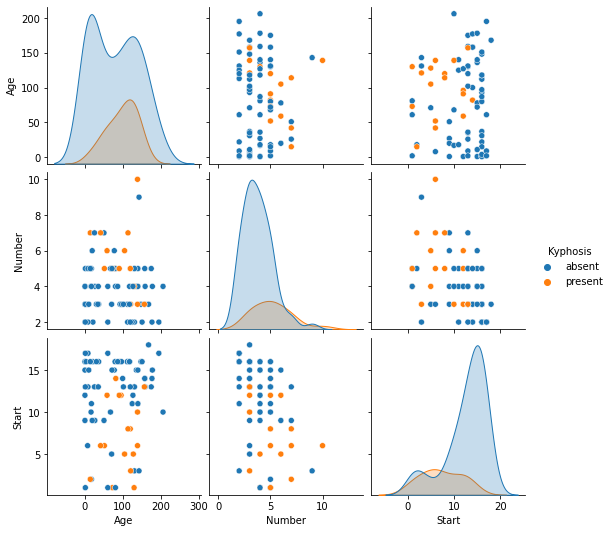

In [4]:
sns.pairplot(df, hue = "Kyphosis")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop("Kyphosis", axis = 1)
y = dfMain["Kyphosis"]

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3)

In [7]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()

In [8]:
decisionTree.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [9]:
pred = decisionTree.predict(xTest)

from sklearn.metrics import classification_report, confusion_matrix

In [10]:
print(classification_report(yTest, pred))
print(confusion_matrix(yTest, pred))

              precision    recall  f1-score   support

      absent       0.88      0.71      0.79        21
     present       0.25      0.50      0.33         4

    accuracy                           0.68        25
   macro avg       0.57      0.61      0.56        25
weighted avg       0.78      0.68      0.72        25

[[15  6]
 [ 2  2]]


In [12]:
from sklearn.ensemble import RandomForestClassifier


In [13]:
def rfc(n):
    
    rfc = RandomForestClassifier(n)
    rfc.fit(xTrain, yTrain)
    
    pred = rfc.predict(xTest)
    
    errorRate = np.mean(pred != yTest)
    
    return errorRate

<AxesSubplot:>

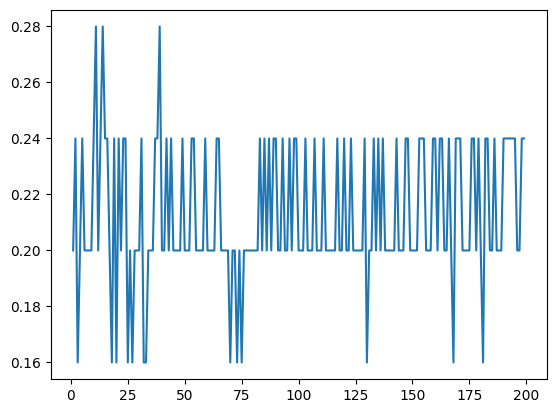

In [15]:
error = []
for i in range(1, 200):
    error.append(rfc(i))
    
sns.lineplot(x = range(1, 200), y = error)

<AxesSubplot:>

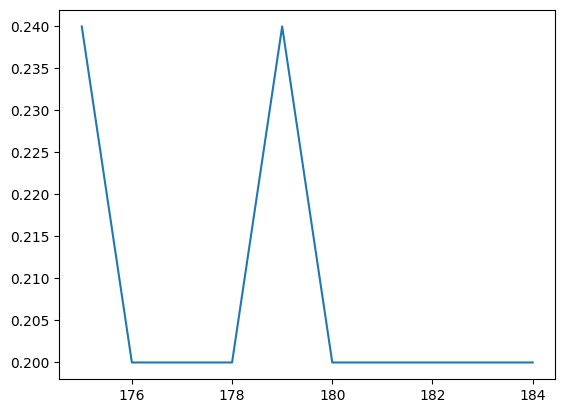

In [19]:
error = []
for i in range(175, 185):
    error.append(rfc(i))
    
sns.lineplot(x = range(175, 185), y = error)

In [20]:
rfc = RandomForestClassifier(180)
rfc.fit(xTrain, yTrain)
    
pred = rfc.predict(xTest)

print(classification_report(yTest, pred))
print(confusion_matrix(yTest, pred))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        21
     present       0.33      0.25      0.29         4

    accuracy                           0.80        25
   macro avg       0.60      0.58      0.58        25
weighted avg       0.78      0.80      0.79        25

[[19  2]
 [ 3  1]]
